In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [6]:
def Radius(X): 
    R2,R3,B,L_m,L_r = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))

In [7]:
Radius((150,200,1,300,150))

377.0092361867768

In [8]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    #return (0.5124256*P1+0.573295*P2-0.52893772*P3-0.00821663*P4-1.2800057*P5)
    #return(0.47080134*P1+0.66054757*P2-0.4892873*P3- 0.01760705*P4-P5)
    #return(0.51906308*P1+0.67298432*P2-0.53143019*P3+ 0.02393847*P4-P5)
    return(0.46851473*P1 + 0.64301304*P2 -0.48044966*P3+0.02032531*P4 -P5)

In [9]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    #return (0.75164007*P1+1.12647244*P2-0.76681364*P3+0.01015549*P4+P5)
    #return (0.9776663*P1+1.17368014*P2-0.97892698*P3+0.02777356*P4+P5 )
    return(0.98097574*P1+1.15711871*P2-0.98056457*P3+0.02958954*P4 +P5)

In [10]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [11]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [12]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_m = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]

Calculation

In [23]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt):
    
    ##Properties of the solid 
    rho_s = 7900  #[kg/m3] Density of the solid
    k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    rho_f = 1000  #[kg/m3] Density of the fluid
    c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    Pr_f  = 6.136 #[-] Prandtl of the fluid
    mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    d_p = 500*10**(-6) #[m] Particle diameter
    
    Epsilon = 0.45  #[-] Porosity
    Epsilon_dp = 0.37  #[-] Porosity
    
    d_ph = d_p*Epsilon_dp/(1-Epsilon_dp) #[m] Particle diameter

    #Magnetic Circuit
    B_rem = 1.43
    N_p = 2
    N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    m_s   = L*W*H*10**-9*(1-Epsilon)*rho_s #mass of the AMR
    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*W*H*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon)/Epsilon)+((1-Epsilon)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*W*H*10**(-9))/(m_f*c_f) 
    #dP = (L/1000)*(150*(1-Epsilon)**2*mu_f*v_s/(Epsilon**3*d_p**2) + 1.75*(1-Epsilon)*rho_f*v_s**2/(Epsilon**3*d_p))
    dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP,Re_dp)
    
    #Effective conduction
    k_e_f = k_f*Epsilon #Fluid effective conduction

    a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    f_0 = 0.8
    k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    k_s_eff = k_e_s
    k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)
    
    #print(C_L,C_H)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,NTU_f,C_HB,C_CB)


    ## Metrics ##

    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE
    #print(dT_mg)

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Efness_CB,(The - Tce),m_f,FE,c_f)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    N_reg = 4/FE

    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))

    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    
    R2 = [W/2+2.5]/np.tan(np.pi/N_reg)
    R_aux = np.sqrt(R2**2-(W/2**2))
    R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    R4 = Radius((R2,R3,B/B_rem,(1+L_xt)*L,L))
    
    W_mag = Qh_reg - Qc_reg - W_pump
    
    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target)

In [24]:
Optimal(1000/3600,0.25,2,150,50,70,1.5,22+273.15,35+273.15,14+273.15,43+273.15,0.5)

(array([5288.06448908]),
 array([0.14228827]),
 array([0.16278331]),
 array([501.40744315]),
 array([248.9514108]),
 array([188.52523095]),
 array([33.14326974]),
 14.462148318999224,
 array([6049.75117799]))

A = Optimal(700/3600,0.25,1.5,150,28,75,1.28,22+273.15,35+273.15,14+273.15,43+273.15)
A[0]/16

In [25]:
Qc_rg = []
Qh_rg = []
W_pump_rg =[]
ECr_c = []
ECr_h = []
N_r = []
R2 = []
R3 = []
R4 = []

for i in range(len(L)):                          
    A1,A2,A3,A4,A5,A6,A7,A8,A9 = Optimal(m_f[i],0.25,f[i],L[i],H[i],W[i],B[i],22+273.15,35+273.15,T_c[i],T_h[i])
    Qc_rg.append(A1)
    Qh_rg.append(A9)
    W_pump_rg.append(A8)
    ECr_c.append(A2)
    ECr_h.append(A3)
    N_r.append(A6)
    R2.append(A6)
    R3.append(A5)
    R4.append(A4)

TypeError: 'int' object is not subscriptable

In [26]:
m_f = np.arange(600,1001,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1.5,1.6,0.5)
L = np.arange(130,181,10)
H = np.arange(25,46,5)
W = np.arange(40,71,5)
B_max = np.arange(1.3,1.36,0.05)
Tce = np.arange(10,15,2)
The = np.arange(41,45,2)
L_xt = np.arange(0.2,0.71,0.1)

In [27]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)

15120

In [28]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 3500

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    it = 0
                                    Q_c_system = 0
                                    while Q_c_system < Q_c_target and it < len(m_f):
                                        A,B,C,D,E,F,G,A1,A2 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q])
                                        Q_c_system = A[0]
                                        it = it + 1
                                    #print(it,Q_c_system)
                                    if Q_c_system > Q_c_target:
                                        Q_c.append(Q_c_system)
                                        m_f_target.append(3600*m_f[it-1])
                                        FE_target.append(FE[i])
                                        f_target.append(f[j])
                                        L_target.append(L[k])
                                        H_target.append(H[l])
                                        W_target.append(W[m])
                                        Tce_target.append(Tce[n])
                                        The_target.append(The[o])
                                        B_target.append(B_max[p])
                                        ECr_c.append(B[0])
                                        ECr_h.append(C[0])
                                        R4.append(D[0])
                                        R3.append(E[0])
                                        R2.append(F[0])
                                        W_mag.append(G[0])
                                        W_pump.append(A1)
                                        Q_h.append(A2[0])
                                        L_xt_target.append(L_xt[q])

                                cont = cont+1
                                print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)))
                            

0.03968253968253968
0.07936507936507936
0.11904761904761904
0.15873015873015872
0.1984126984126984
0.23809523809523808
0.2777777777777778
0.31746031746031744
0.35714285714285715
0.3968253968253968
0.4365079365079365
0.47619047619047616
0.5158730158730159
0.5555555555555556
0.5952380952380952
0.6349206349206349
0.6746031746031746
0.7142857142857143
0.753968253968254
0.7936507936507936
0.8333333333333334
0.873015873015873
0.9126984126984127
0.9523809523809523
0.9920634920634921
1.0317460317460319
1.0714285714285714
1.1111111111111112
1.1507936507936507
1.1904761904761905
1.2301587301587302
1.2698412698412698
1.3095238095238095
1.3492063492063493
1.3888888888888888
1.4285714285714286
1.4682539682539681
1.507936507936508
1.5476190476190477
1.5873015873015872
1.626984126984127
1.6666666666666667
1.7063492063492063
1.746031746031746
1.7857142857142858
1.8253968253968254
1.8650793650793651
1.9047619047619047
1.9444444444444444
1.9841269841269842
2.0238095238095237
2.0634920634920637
2.1031746

17.896825396825395
17.936507936507937
17.976190476190474
18.015873015873016
18.055555555555557
18.095238095238095
18.134920634920636
18.174603174603174
18.214285714285715
18.253968253968253
18.293650793650794
18.333333333333332
18.373015873015873
18.41269841269841
18.452380952380953
18.49206349206349
18.53174603174603
18.571428571428573
18.61111111111111
18.650793650793652
18.69047619047619
18.73015873015873
18.76984126984127
18.80952380952381
18.849206349206348
18.88888888888889
18.928571428571427
18.96825396825397
19.00793650793651
19.047619047619047
19.08730158730159
19.126984126984127
19.166666666666668
19.206349206349206
19.246031746031747
19.285714285714285
19.325396825396826
19.365079365079364
19.404761904761905
19.444444444444443
19.484126984126984
19.523809523809526
19.563492063492063
19.603174603174605
19.642857142857142
19.682539682539684
19.72222222222222
19.761904761904763
19.8015873015873
19.841269841269842
19.88095238095238
19.92063492063492
19.96031746031746
20.0
20.039

35.63492063492063
35.67460317460318
35.714285714285715
35.75396825396825
35.79365079365079
35.833333333333336
35.87301587301587
35.91269841269841
35.95238095238095
35.992063492063494
36.03174603174603
36.07142857142857
36.111111111111114
36.15079365079365
36.19047619047619
36.23015873015873
36.26984126984127
36.30952380952381
36.34920634920635
36.388888888888886
36.42857142857143
36.46825396825397
36.507936507936506
36.54761904761905
36.58730158730159
36.62698412698413
36.666666666666664
36.70634920634921
36.74603174603175
36.785714285714285
36.82539682539682
36.86507936507937
36.904761904761905
36.94444444444444
36.98412698412698
37.023809523809526
37.06349206349206
37.1031746031746
37.142857142857146
37.182539682539684
37.22222222222222
37.26190476190476
37.301587301587304
37.34126984126984
37.38095238095238
37.42063492063492
37.46031746031746
37.5
37.53968253968254
37.57936507936508
37.61904761904762
37.65873015873016
37.698412698412696
37.73809523809524
37.77777777777778
37.8174603

53.73015873015873
53.76984126984127
53.80952380952381
53.84920634920635
53.888888888888886
53.92857142857143
53.96825396825397
54.007936507936506
54.04761904761905
54.08730158730159
54.12698412698413
54.166666666666664
54.20634920634921
54.24603174603175
54.285714285714285
54.32539682539682
54.36507936507937
54.404761904761905
54.44444444444444
54.48412698412698
54.523809523809526
54.56349206349206
54.6031746031746
54.642857142857146
54.682539682539684
54.72222222222222
54.76190476190476
54.801587301587304
54.84126984126984
54.88095238095238
54.92063492063492
54.96031746031746
55.0
55.03968253968254
55.07936507936508
55.11904761904762
55.15873015873016
55.198412698412696
55.23809523809524
55.27777777777778
55.317460317460316
55.357142857142854
55.3968253968254
55.43650793650794
55.476190476190474
55.51587301587302
55.55555555555556
55.595238095238095
55.63492063492063
55.67460317460318
55.714285714285715
55.75396825396825
55.79365079365079
55.833333333333336
55.87301587301587
55.912698

72.14285714285714
72.18253968253968
72.22222222222223
72.26190476190476
72.3015873015873
72.34126984126983
72.38095238095238
72.42063492063492
72.46031746031746
72.5
72.53968253968254
72.57936507936508
72.61904761904762
72.65873015873017
72.6984126984127
72.73809523809524
72.77777777777777
72.81746031746032
72.85714285714286
72.89682539682539
72.93650793650794
72.97619047619048
73.01587301587301
73.05555555555556
73.0952380952381
73.13492063492063
73.17460317460318
73.21428571428571
73.25396825396825
73.2936507936508
73.33333333333333
73.37301587301587
73.41269841269842
73.45238095238095
73.4920634920635
73.53174603174604
73.57142857142857
73.61111111111111
73.65079365079364
73.69047619047619
73.73015873015873
73.76984126984127
73.80952380952381
73.84920634920636
73.88888888888889
73.92857142857143
73.96825396825396
74.0079365079365
74.04761904761905
74.08730158730158
74.12698412698413
74.16666666666667
74.2063492063492
74.24603174603175
74.28571428571429
74.32539682539682
74.365079365

90.63492063492063
90.67460317460318
90.71428571428571
90.75396825396825
90.7936507936508
90.83333333333333
90.87301587301587
90.91269841269842
90.95238095238095
90.9920634920635
91.03174603174604
91.07142857142857
91.11111111111111
91.15079365079364
91.19047619047619
91.23015873015873
91.26984126984127
91.30952380952381
91.34920634920636
91.38888888888889
91.42857142857143
91.46825396825396
91.5079365079365
91.54761904761905
91.58730158730158
91.62698412698413
91.66666666666667
91.7063492063492
91.74603174603175
91.78571428571429
91.82539682539682
91.86507936507937
91.9047619047619
91.94444444444444
91.98412698412699
92.02380952380952
92.06349206349206
92.10317460317461
92.14285714285714
92.18253968253968
92.22222222222223
92.26190476190476
92.3015873015873
92.34126984126983
92.38095238095238
92.42063492063492
92.46031746031746
92.5
92.53968253968254
92.57936507936508
92.61904761904762
92.65873015873017
92.6984126984127
92.73809523809524
92.77777777777777
92.81746031746032
92.857142857

In [29]:
np.array(m_f_target)/3600*4/8

array([0.12916667, 0.12916667, 0.12916667, ..., 0.09097222, 0.09097222,
       0.09097222])

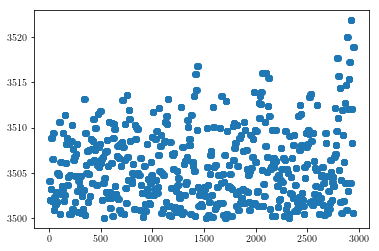

In [30]:
plt.plot(Q_c,'o')

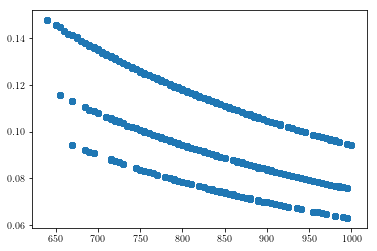

In [31]:
plt.plot(m_f_target,np.array(ECr_c),'o')

for i in range(len(m_f_target)):
    if isnan(W_FT_c[i]) == True:
        print(i)

In [32]:
N_circ_cold = 6
N_circ_hot = 8

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

In [33]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

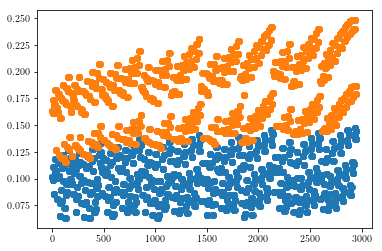

In [34]:
plt.plot(ECr_c,'o')
plt.plot(ECr_h,'o')

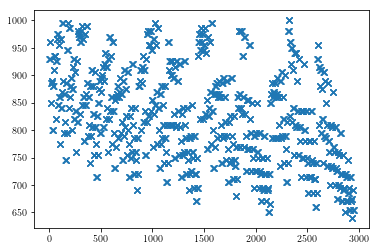

In [35]:
plt.plot(m_f_target,'x')

In [39]:
m_La = 4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(1-0.45)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+40)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(0.465)*1000*10**-9)

In [40]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*4/np.array(FE_target) + np.array(W_pump)*4/np.array(FE_target) + W_valve + W_p_valve

In [41]:
m_p = []
W_pa =[]

m_Nd_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []

R2_p = []
R3_p = []
R4_p = []
L_xt_p = []


for i in range(len(m_T)):
    #print(i)
    A = 0
    for j in  range(len(m_T)):
        if m_T[i] >= m_T[j] and round(W_T[i],2) > round(W_T[j],2):
            A = 1
    if A == 0 :
        
        
        A = Optimal(m_f_target[i]/3600,0.25,f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],22+273.15,35+273.15,Tce_target[i],The_target[i],L_xt_target[i])
        print(m_T[i],W_T[i],A[0])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

729.5020060114148 1312.6866978969456 [3761.8580969]
783.0579705110368 1089.6841250338475 [3531.83326047]
839.5290589144118 1037.665031776265 [3459.6625388]
748.6333465733765 1191.615027380557 [3648.67522588]
774.2437437190813 1191.615027380557 [3648.67522588]
799.6896058633267 1056.832354955945 [3482.73217348]
826.8911934483878 1056.832354955945 [3482.73217348]
853.9982961882556 1015.8679026640214 [3426.91973188]
882.9072511016122 1015.8679026640214 [3426.91973188]
911.3856604883526 1006.3057681060998 [3406.93379739]
942.1114014632544 1006.3057681060998 [3406.93379739]
977.3307917135642 1006.3057681060998 [3406.93379739]
1015.5147655397635 1006.3057681060998 [3406.93379739]
1055.7277585185109 1006.3057681060998 [3406.93379739]
1097.3702131744753 1006.3057681060998 [3406.93379739]


In [42]:
W_pa,m_p

([1312.6866978969456,
  1089.6841250338475,
  1037.665031776265,
  1191.615027380557,
  1191.615027380557,
  1056.832354955945,
  1056.832354955945,
  1015.8679026640214,
  1015.8679026640214,
  1006.3057681060998,
  1006.3057681060998,
  1006.3057681060998,
  1006.3057681060998,
  1006.3057681060998,
  1006.3057681060998],
 [729.5020060114148,
  783.0579705110368,
  839.5290589144118,
  748.6333465733765,
  774.2437437190813,
  799.6896058633267,
  826.8911934483878,
  853.9982961882556,
  882.9072511016122,
  911.3856604883526,
  942.1114014632544,
  977.3307917135642,
  1015.5147655397635,
  1055.7277585185109,
  1097.3702131744753])

Text(0, 0.5, 'Power [W]')

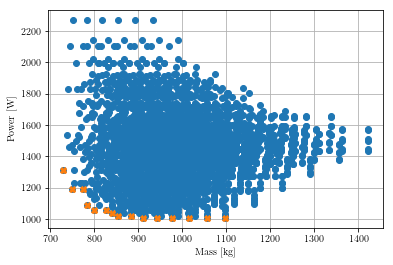

In [43]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.savefig('Optimum_2Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [38]:
f_p,L_p,H_p,W_p,B_max_p

([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
 [150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
 [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40],
 [50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 60, 60, 60],
 [1.4000000000000001,
  1.4000000000000001,
  1.4000000000000001,
  1.3,
  1.3,
  1.35,
  1.35,
  1.4000000000000001,
  1.4000000000000001,
  1.4000000000000001,
  1.4000000000000001,
  1.4000000000000001,
  1.4000000000000001])

In [39]:
i=2
Optimal(m_f_p[i]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])

(array([2892.45612425]),
 array([0.00370414]),
 array([-0.00356742]),
 array([382.45729284]),
 array([187.87736907]),
 array([138.25183603]),
 array([-28.73341814]),
 13.981814163840683,
 array([2656.43046059]))

In [40]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i],1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

In [41]:
m_p

[711.8131908830313,
 734.6578590618653,
 762.9151017481562,
 634.004802242838,
 654.113360356719,
 672.5215333920041,
 693.9859346496488,
 765.2418745380805,
 789.6082188776647,
 819.8167837515733,
 822.315758785997,
 848.3233163933224,
 880.6314902769093]

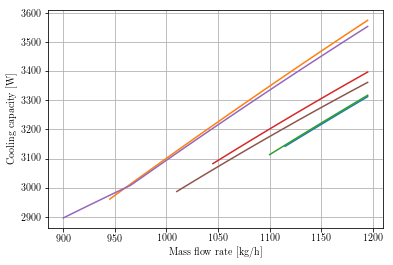

In [490]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i])
plt.grid()
plt.xlabel('Mass flow rate [kg/h]')
plt.ylabel('Cooling capacity [W]')
plt.savefig('Opt.png',format = 'png', dpi=500,bbox_inches='tight')

In [367]:
m_p,W_pa

([642.138861957453,
  642.138861957453,
  642.138861957453,
  599.3485972234614,
  676.1922565562862,
  630.5942935784649],
 [1312.4790925239633,
  1014.0341360281254,
  1304.8663072276397,
  1466.1822649026083,
  986.5401952503233,
  1426.6708244008755])

In [368]:
m_L180 = m_p
W_L180 = W_pa

In [369]:
plt.plot(m_L140,W_L140,'o', label = 'L = 140 mm')
plt.plot(m_L160,W_L160,'o', label = 'L = 160 mm')
plt.plot(m_L180,W_L180,'o', label = 'W = 180 mm')

plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend()
#plt.savefig('Length.png',format = 'png', dpi=500,bbox_inches='tight')

NameError: name 'm_L140' is not defined

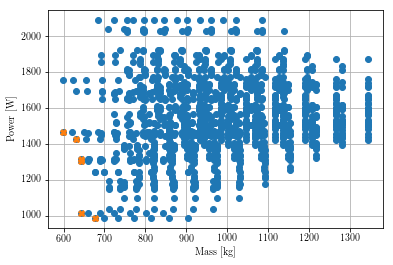

In [370]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
#plt.xlim([500,700])
#plt.ylim([1000,2500])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.savefig('Optimum_zoom_1Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [371]:
dP_AMR = np.array(W_pump)/(np.array(m_f_target)/3600)*1000

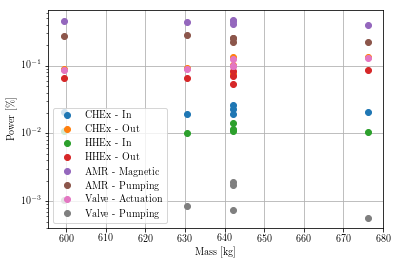

In [372]:
plt.semilogy(m_p,np.array(W_p_CHEx_p)/np.array(W_pa),'o',label = 'CHEx - In')
plt.semilogy(m_p,np.array(W_p_CHEx_f)/np.array(W_pa),'o',label = 'CHEx - Out')
plt.semilogy(m_p,np.array(W_p_HHEx_p)/np.array(W_pa),'o',label = 'HHEx - In')
plt.semilogy(m_p,np.array(W_p_HHEx_f)/np.array(W_pa),'o',label = 'HHEx - Out')
plt.semilogy(m_p,np.array(W_p_mag)/np.array(W_pa),'o',label = 'AMR - Magnetic')
plt.semilogy(m_p,np.array(W_p_pump)/np.array(W_pa),'o',label = 'AMR - Pumping')
plt.semilogy(m_p,np.array(W_pa_valve)/np.array(W_pa),'o',label = 'Valve - Actuation')
plt.semilogy(m_p,np.array(W_pa_p_valve)/np.array(W_pa),'o',label = 'Valve - Pumping')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [$\%$]')
plt.legend()
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [373]:
workbook = xlsxwriter.Workbook('Optimization_results_1Hz.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    

workbook.close()

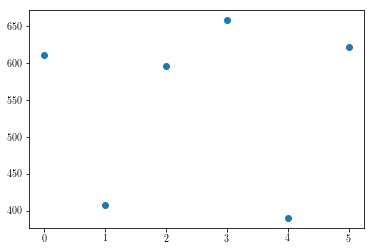

In [374]:
A = W_p_CHEx_f +W_p_CHEx_p
plt.plot(W_p_mag,'o')

In [375]:
W_pa

[1312.4790925239633,
 1014.0341360281254,
 1304.8663072276397,
 1466.1822649026083,
 986.5401952503233,
 1426.6708244008755]

In [376]:
len(W_p_valve)

1400

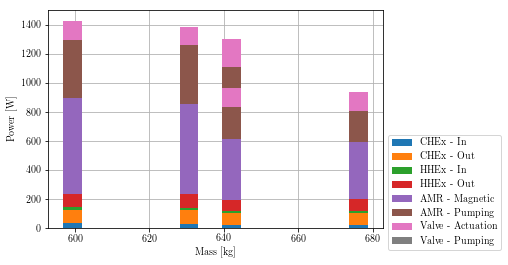

In [377]:
width = 5
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,0.45))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [378]:
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*(1.3*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*(5/3**np.array(L_p)/1000)*7500
m_Fe_p_10 = np.pi*((np.array(R4_p)+10)**2-np.array(R4_p)**2)*10**-6*(5/3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_20 = np.pi*((np.array(R4_p)+20)**2-(np.array(R4_p)+10)**2)*10**-6*(5/3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_40 = np.pi*((np.array(R4_p)+40)**2-(np.array(R4_p)+20)**2)*10**-6*(5/3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_80 = np.pi*((np.array(R4_p)+80)**2-(np.array(R4_p)+40)**2)*10**-6*(5/3*np.array(L_p)/1000)*7500 #25**2 

[175.9568822244047,
 175.9568822244047,
 175.9568822244047,
 150.82018476377544,
 175.9568822244047,
 150.82018476377544]

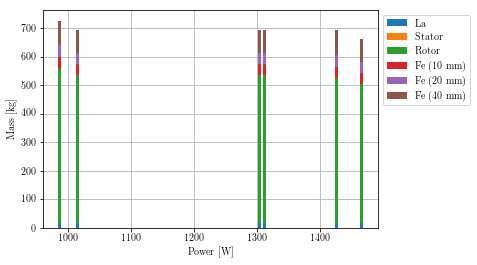

In [379]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p_10, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_20, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10), label = 'Fe (20 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_40, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20), label = 'Fe (40 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [42]:
m_p,W_pa

([628.8416689095038,
  677.5777092234468,
  598.7256878311966,
  631.0020661577161,
  734.0425183254007,
  596.2524914443759,
  628.270048807583,
  733.6486137277545,
  790.5073274273547,
  589.8460156712292,
  621.3799988254984,
  673.1464808652674,
  728.079307105057,
  786.0520861368799,
  846.9721365293085,
  611.154979942932,
  776.6179275787274,
  838.4555585460051,
  903.4369456312623,
  890.8590309551305,
  959.9017547332163,
  943.2625033642558,
  1016.3665638351704],
 [1110.7960597159658,
  1047.1235342853874,
  1242.4065738561055,
  1110.4675051063023,
  1008.5569001584053,
  1246.9260344447873,
  1135.5375914568465,
  1012.6299607421571,
  972.1011863834876,
  1288.5713509382683,
  1174.1098978412676,
  1078.9876055624316,
  1026.0358027711263,
  985.5888151832055,
  943.9901023247666,
  1235.9423728628226,
  999.8065177812388,
  957.3658989853099,
  925.4550951429043,
  936.0709899763563,
  907.4972646697432,
  916.8625093788762,
  888.5572727655237])

In [43]:
len(W_pa)

23

ValueError: x and y must have same first dimension, but have shapes (670,) and (216, 1)

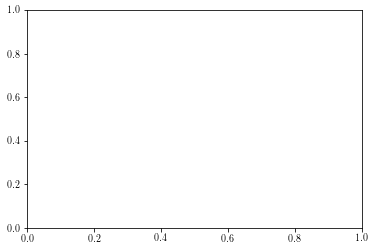

In [44]:
erro_Qc = np.arange(-100,250)
plt.plot(Q_c,np.array(Qc_rg)/16,'o')
plt.plot(erro_Qc,1.1*erro_Qc,'k--')
plt.plot(erro_Qc,0.9*erro_Qc,'k--')
plt.grid()
plt.ylabel('Analytical Cooling Capacity [W]')
plt.xlabel('Numerical Cooling Capacity [W]')
plt.xlim(100,250)
plt.ylim(100,250)
plt.savefig('Qc_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Qh = np.arange(-100,350)
plt.plot(Q_h,np.array(Qh_rg)/16,'o')
plt.plot(erro_Qh,1.1*erro_Qh,'k--')
plt.plot(erro_Qh,0.9*erro_Qh,'k--')
plt.grid()
plt.ylabel('Analytical Rejected Heat [W]')
plt.xlabel('Numerical Rejected Heat [W]')
plt.xlim(120,300)
plt.ylim(120,300)
plt.savefig('Qh_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Wp = np.arange(0,25)
plt.plot(W_p,W_pump_rg,'o')

plt.plot(erro_Wp,1.1*erro_Wp,'k--')
plt.plot(erro_Wp,0.9*erro_Wp,'k--')
plt.grid()
plt.ylabel('Analytical Pumping Power [W]')
plt.xlabel('Numerical Pumping Power [W]')
#plt.xlim(120,300)
#plt.ylim(120,300)

### Closure Relations

In [ ]:
plt.plot(N_r,R4,'o')

In [ ]:
plt.plot(H,np.array(R3)-np.array(R2),'o')

Regenerator arranges